<a href="https://colab.research.google.com/github/UCLAbrucequ/CHIPS_Color_identification/blob/main/Color_Identification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Connect Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import **Libraries**

In [2]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import cv2
import pandas as pd
from collections import Counter

# Input Image

The format of the image is <class 'numpy.ndarray'>
The shape of the image is (1352, 2160, 3)


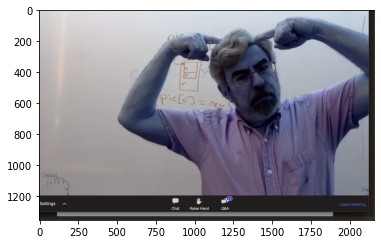

In [3]:
image_path = '/content/drive/MyDrive/UCLA CHIPS research/sample_image.jpeg'

image = cv2.imread(image_path)
print('The format of the image is {}'.format(type(image)))
print('The shape of the image is {}'.format(image.shape))
plt.imshow(image)

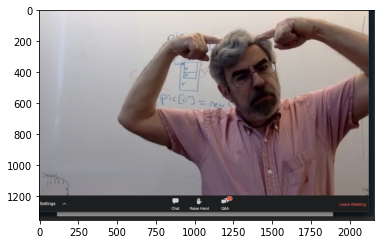

In [4]:
#To convert the color from BGR to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

# Color Identification

In [7]:
#a function that can transform the RGB to hexdecimal
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2])) # corresponds RGB

#example case: transform all three number to hex
sample_color = [5.03, 4.05, 23.34]
RGB2HEX(sample_color)

'#050417'

The "get_image" function extracts the image from the image_path and convert the color from BGR to RGB. The function returns a image.

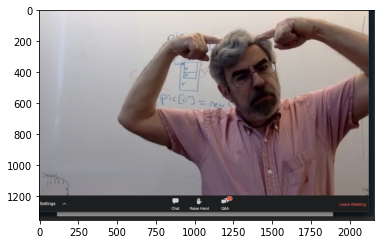

In [8]:
#get_image function
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

plt.imshow(get_image('/content/drive/MyDrive/UCLA CHIPS research/sample_image.jpeg'))


The "get_color" function

In [11]:
#The get_color function should take in an image, seperate the colors in the image into #(num_of_colors) of clusters, and show the pie chart if specified.

def get_color(image, num_of_colors, show_chart):
    ## image = input
    ## num_of_colors = # of clusters
    ## show_chart = A boolean that determines whether or not we show the pie chart

    ## First step: Resize the image
    modified_image = cv2.resize(image, (600,400), interpolation = cv2.INTER_AREA)

    ##show the modified image
    ##plt.imshow(modified_image)

    ##flatten the image, because Kmeans uses the flattened version of the image
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)


    clf = KMeans(n_clusters= num_of_colors)
    labels = clf.fit_predict(modified_image)

    counts = Counter(labels)
    # sort to ensure correct color percentage
    counts = dict(sorted(counts.items()))
    
    center_colors = clf.cluster_centers_
    # We get ordered colors by iterating through the keys
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]

    if (show_chart):
        plt.figure(figsize = (8, 6))
        plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)
    
    return rgb_colors



[array([136.88842626, 109.51818359, 110.97261076]),
 array([221.2043438 , 215.49317182, 212.30302446]),
 array([30.94036475, 27.04370217, 29.7361937 ]),
 array([156.91715671, 155.40718373, 159.41262715]),
 array([98.00597931, 69.02448916, 70.94935787]),
 array([115.18919713,  86.78949109,  94.27312144]),
 array([147.59116173, 140.9184672 , 141.45749178]),
 array([197.62813145, 194.19596839, 194.28077579]),
 array([72.51198567, 46.25172541, 45.56198304]),
 array([181.        , 177.2033332 , 178.13460085])]

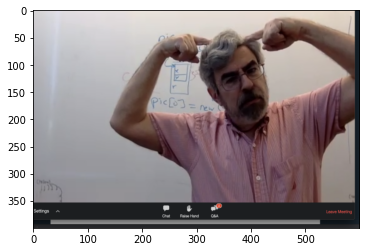

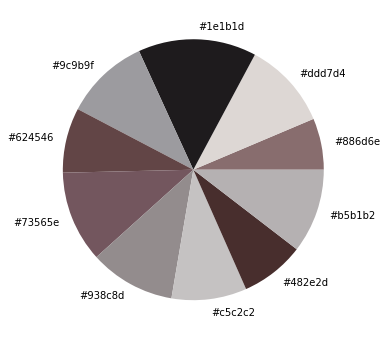

In [12]:
get_color(get_image('/content/drive/MyDrive/UCLA CHIPS research/sample_image.jpeg'), 10, True)
